- importo le librerie/scelgo le tecnologie in base alla task
- Importo il csv
- studio il csv con pandas, mi guardo le colonne, mi faccio le descrizioni, mi plotto i grafici ecc...
- Una volta scelto il modello che devo applicare, comincio a fare del preprocessing sul csv.
- posso applicare il modello con il fit e poi predict per ricavarne i risultati (Class, Regre e Forecasting) (Clustering non si fa lo split di dati)
- Mostriamo grafici e accuracy (report in generale) per vedere e testare il modello. 

In [35]:
import pandas as pd

file_path = "../0.datasets/mushrooms.csv"

mush_df = pd.read_csv(file_path)

print(mush_df.head())

# print(mush_df.isna().sum())
# most_frequent = mush_df['bruises'].mode()[0]

# mush_df['bruises'] = mush_df['bruises'].fillna(most_frequent)
# print(most_frequent)

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

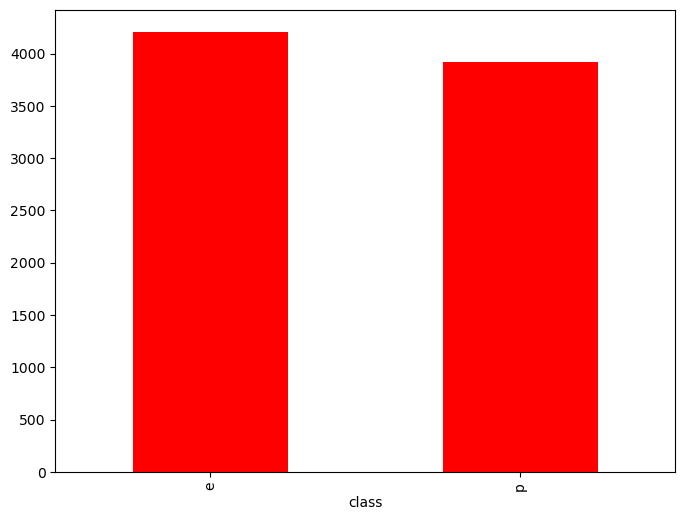

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
counts = mush_df['class'].value_counts()
counts.plot(kind='bar', color='red')
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in mush_df.columns:
    mush_df[column] = label_encoder.fit_transform(mush_df[column])

print(mush_df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

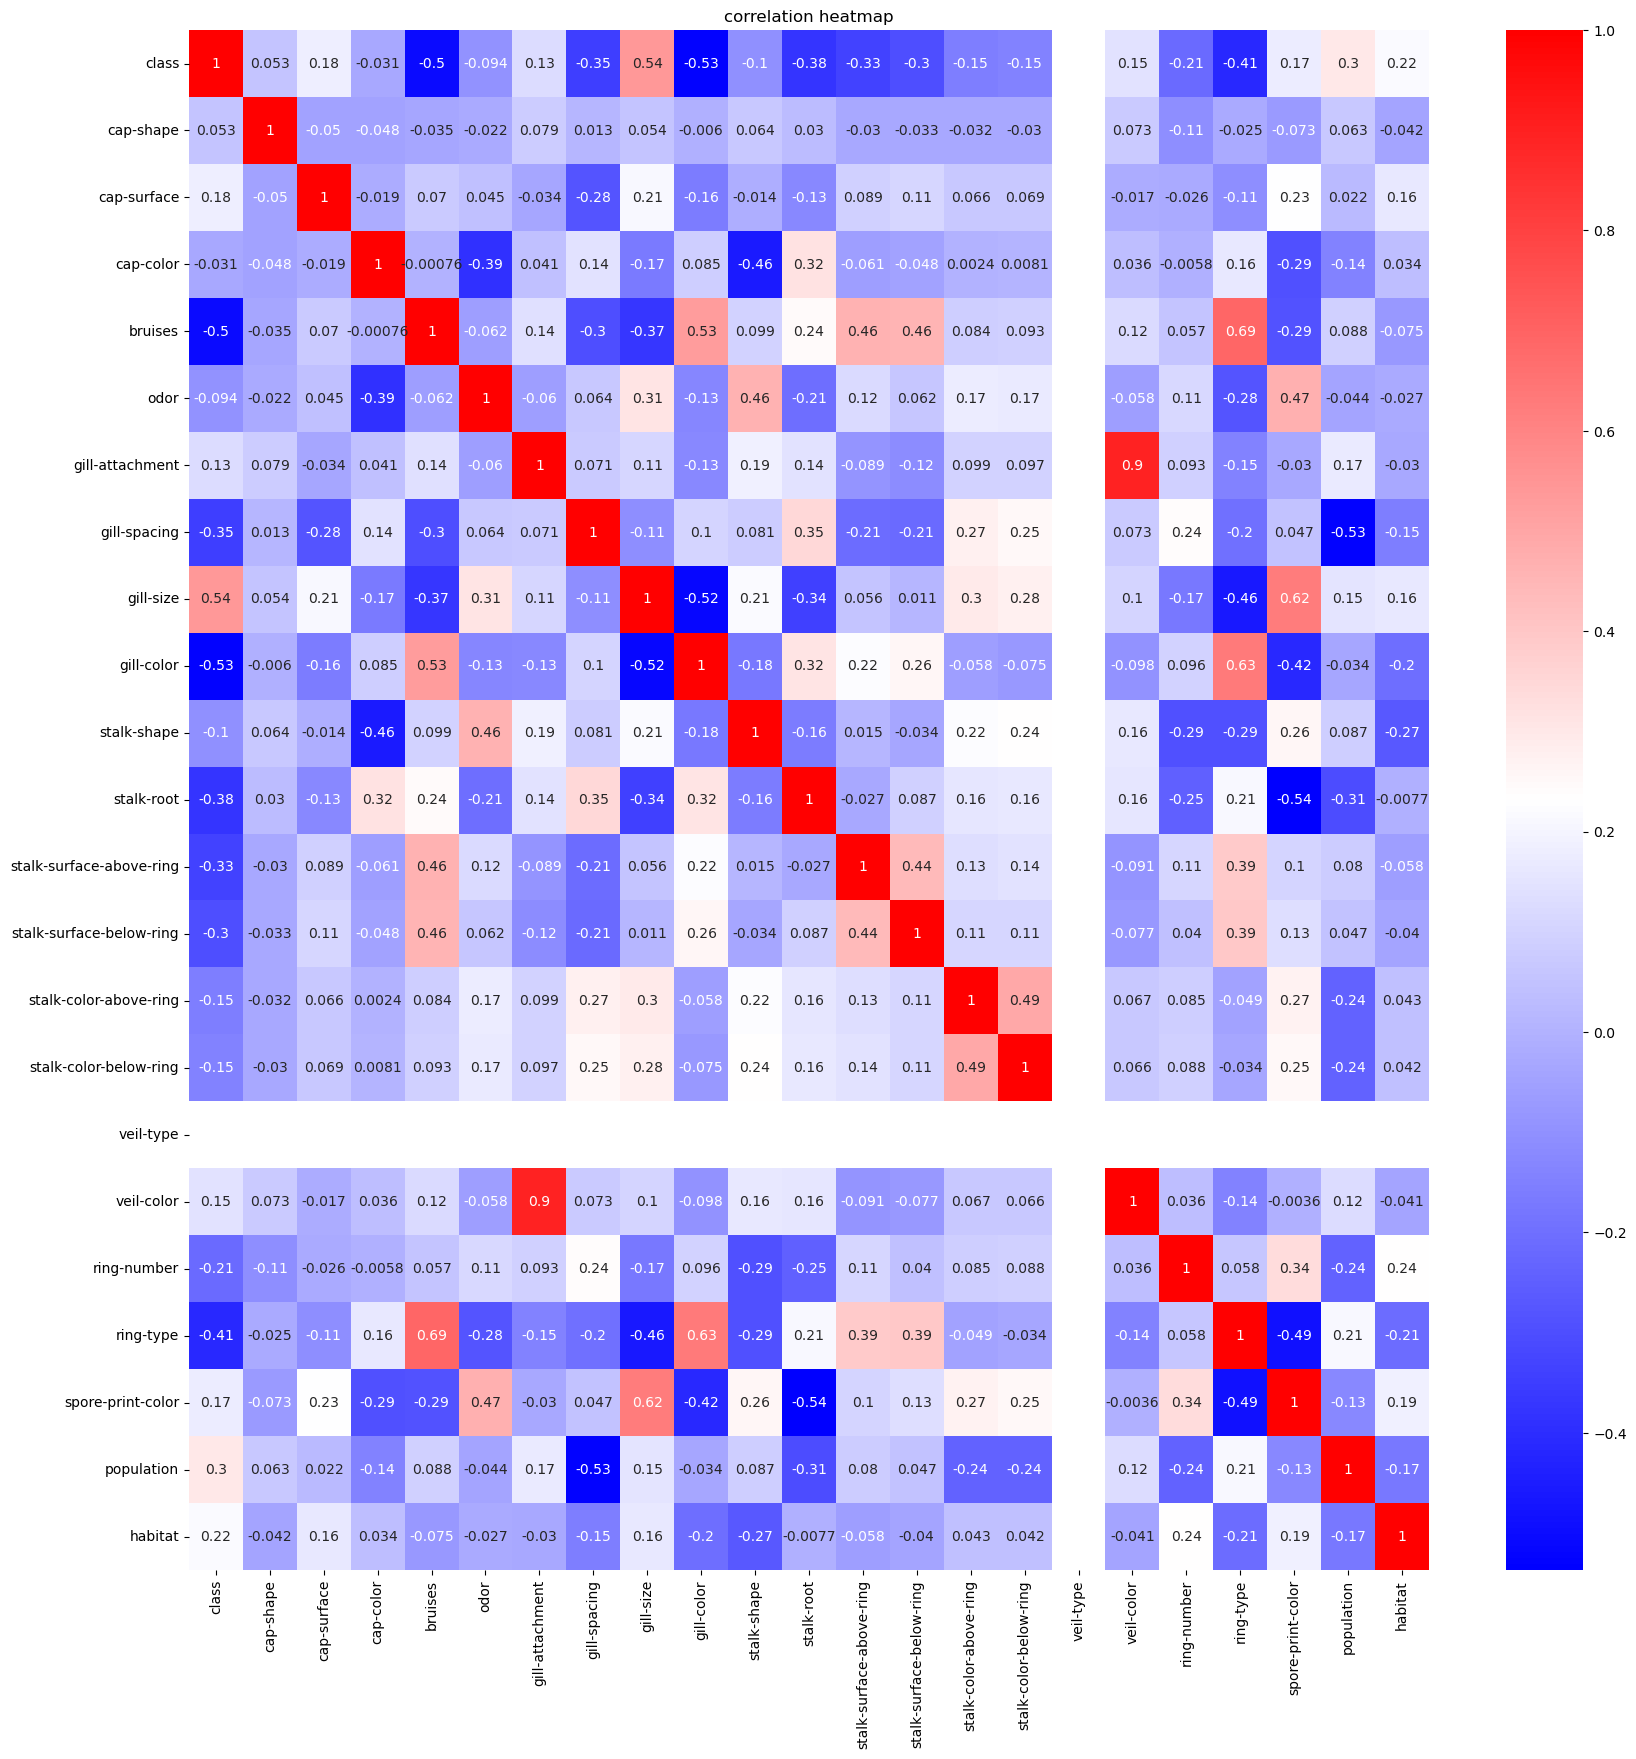

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Definizione di una colormap personalizzata
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["blue", "white", "red"])

# Calcolo della matrice di correlazione
correlation_matrix = mush_df.corr()

## grafico con seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.title('correlation heatmap')
plt.show()

## grafico brutto con matplotlib
# # Creazione della heatmap
# fig, ax = plt.subplots(figsize=(10, 8))
# heatmap = ax.imshow(correlation_matrix.values, cmap='viridis', aspect='auto')

# # Aggiungiamo le etichette
# ax.set_xticks(np.arange(len(correlation_matrix.columns)))
# ax.set_yticks(np.arange(len(correlation_matrix.index)))
# ax.set_xticklabels(correlation_matrix.columns)
# ax.set_yticklabels(correlation_matrix.index)

# # Ruotiamo le etichette sull'asse x e y
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=45, ha='right')

# # Aggiungiamo una barra di colore
# cbar = plt.colorbar(heatmap)

# # Titolo e visualizzazione
# plt.title("Heatmap della Matrice di Correlazione")
# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = mush_df.drop(columns=['class', 'odor', 'gill-size'])
y = mush_df['class']

X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [66]:
new_mushroom = [[1,2,3,4,5,1,2,3,3,2,3,2,1,2,3,4,2,3,4,1,2,3]]

rf_prediction = rf_model.predict(new_mushroom)

print(f"{'Commestibile' if rf_prediction == 1 else 'Velenoso'}")

Velenoso


/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


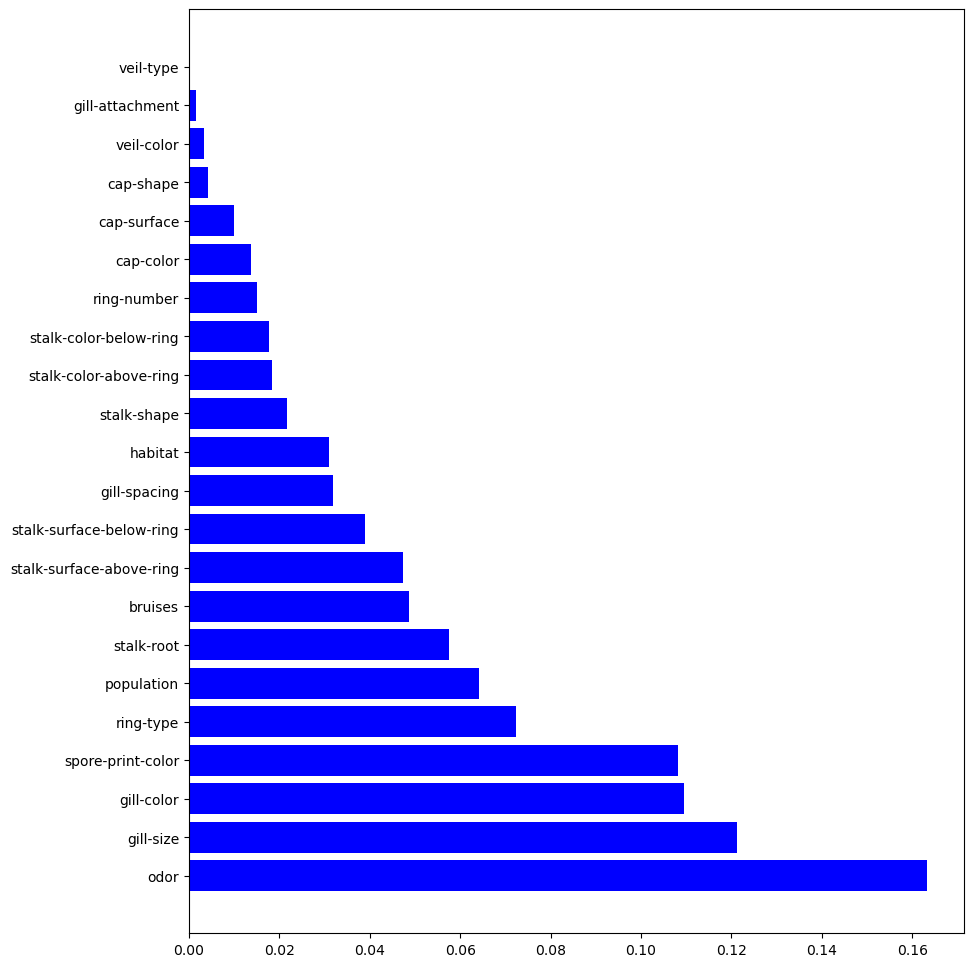

In [67]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_

features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})

feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,12))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='blue')

plt.show()